In [1]:
import numpy as np
import logging
from copy import deepcopy
import os

In [2]:
from cosmicfishpie.fishermatrix import cosmicfish
from cosmicfishpie.LSSsurvey import spectro_obs as spobs
from cosmicfishpie.LSSsurvey import spectro_cov as spcov
from cosmicfishpie.utilities.utils import printing as upr

In [3]:
from nautilus import Prior
from nautilus import Sampler

In [4]:
from cosmicfishpie.likelihood.spectro_like import observable_Pgg, legendre_Pgg, loglike

In [5]:
os.environ["OMP_NUM_THREADS"] = "6"

# Compute fiducial data and theory

In [6]:
fiducial = {
    "Omegam": 0.3145714273,
    "Omegab": 0.0491989,
    "h": 0.6737,
    "ns": 0.96605,
    "sigma8": 0.81,
    "w0": -1.0,
    "wa": 0.0,
    "mnu": 0.06,
    "Neff": 3.044,
}
observables = ['GCsp']

## Compute symbolic Observable

In [7]:
options = {
    "accuracy": 1,
    "feedback": 1,
    "code": "symbolic",
    "outroot": "Euc-ISTF-Pess-symb",
    "survey_name": "Euclid",
    #"survey_name_spectro": "SKAO-Spectroscopic-Redbook",
    "survey_name_spectro": "Euclid-Spectroscopic-ISTF-Pessimistic",
    "survey_name_photo": False,
    #"survey_name_radio_IM": "SKAO-IM-Redbook",
    #'specs_dir': '../cosmicfishpie/configs/other_survey_specifications/',
    "cosmo_model": "LCDM",
    "bfs8terms": False,
}
cosmoFM_theory = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)
print(cosmoFM_theory.Spectrobiaspars)
print(cosmoFM_theory.freeparams)
cosmoFM_theory.compute()

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic

  -> Computing cosmology at the fiducial point
10^9As value not found

  ---> Cosmological functions obtained in:   0.19 s
{'lnbg_1': 0.37944989, 'lnbg_2': 0.4738057, 'lnbg_3': 0.55760176, 'lnbg_4': 0.64125687}
{'Omegam': 0.01, 'Omegab': 0.01, 'h': 0.01, 'ns': 0.01, 'sigma8': 0.01, 'Ps_1': 0.0001, 'Ps_2': 0.0001, 'Ps_3': 0.0001, 'Ps_4': 0.0001, 'lnbg_1': 0.0001, 'lnbg_2': 0.0001, 'lnbg_3': 0.0001, 'lnbg_4': 0.0001}

In class: FisherMatrix  ----> Computing Pk-spectro Fisher matrix
Computing derivatives of G

In [8]:
#cosmoFM_fid.set_pk_settings()
print(cosmoFM_theory.pk_cov.global_z_bin_mids)
print(cosmoFM_theory.Pk_kgrid.shape)
print(cosmoFM_theory.obs_spectrum)
print(cosmoFM_theory.Pk_musamp)
print(cosmoFM_theory.Pk_ksamp)
print(cosmoFM_theory.Pk_mumesh.shape)
print(cosmoFM_theory.Pk_kgrid.shape)
# spectro_fid = spobs.ComputeGalSpectro(cosmoFM_fid.fiducialcosmopars,
#                                        spectrobiaspars=cosmoFM_fid.Spectrobiaspars,
#                                        spectrononlinearpars=cosmoFM_fid.Spectrononlinpars,
#                                        PShotpars=cosmoFM_fid.PShotpars,
#                                        IMbiaspars=cosmoFM_fid.IMbiaspars,
#                                        fiducial_cosmo=cosmoFM_fid.fiducialcosmo,
#                                        use_bias_funcs=False, 
#                                        configuration=cosmoFM_fid)

# spectro_cov_fid = spcov.SpectroCov(fiducialpars=cosmoFM_fid.fiducialcosmopars,
#                                    configuration=cosmoFM_fid)


#volume_surveys = np.array([spectro_cov_fid.volume_survey(ii) for ii in range(len(spectro_cov_fid.global_z_bin_mids))])

[1.   1.2  1.4  1.65]
(513,)
['g', 'g']
9
513
(9, 513)
(513,)


## Compute camb Observable

In [9]:
options = {
    "accuracy": 1,
    "feedback": 1,
    "code": "class",
    "outroot": "Euc-ISTF-Pess-class",
    "survey_name": "Euclid",
    #"survey_name_spectro": "SKAO-Spectroscopic-Redbook",
    "survey_name_spectro": "Euclid-Spectroscopic-ISTF-Pessimistic",
    "survey_name_photo": False,
    #"survey_name_radio_IM": "SKAO-IM-Redbook",
    #'specs_dir': '../cosmicfishpie/configs/other_survey_specifications/',
    "cosmo_model": "LCDM",
    "bfs8terms": False,
}
cosmoFM_data = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)
print(cosmoFM_data.Spectrobiaspars)
print(cosmoFM_data.freeparams)
cosmoFM_data.compute()

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic

  -> Computing cosmology at the fiducial point


CosmoSevereError: 

Error in Class: Class did not read input parameter(s): w0_fld, wa_fld


NameError: name 'cosmoFM_data' is not defined

In [10]:
cosmoFM_data.freeparams

NameError: name 'cosmoFM_data' is not defined

In [10]:
#cosmoFM_fid.set_pk_settings()
print(cosmoFM_data.pk_cov.global_z_bin_mids)
print(cosmoFM_data.Pk_kgrid.shape)
print(cosmoFM_data.obs_spectrum)
print(cosmoFM_data.Pk_musamp)
print(cosmoFM_data.Pk_ksamp)
print(cosmoFM_data.Pk_mumesh.shape)
print(cosmoFM_data.Pk_kgrid.shape)
spectro_data = spobs.ComputeGalSpectro(cosmoFM_data.fiducialcosmopars,
                                       spectrobiaspars=cosmoFM_data.Spectrobiaspars,
                                       spectrononlinearpars=cosmoFM_data.Spectrononlinpars,
                                       PShotpars=cosmoFM_data.PShotpars,
                                       IMbiaspars=cosmoFM_data.IMbiaspars,
                                       fiducial_cosmo=cosmoFM_data.fiducialcosmo,
                                       use_bias_funcs=False, 
                                       configuration=cosmoFM_data)

spectro_cov_data = spcov.SpectroCov(fiducialpars=cosmoFM_data.fiducialcosmopars,
                                   configuration=cosmoFM_data)



[1.   1.2  1.4  1.65]
(513,)
['g', 'g']
9
513
(9, 513)
(513,)


In [11]:
min(cosmoFM_theory.Pk_kgrid)

0.0006737

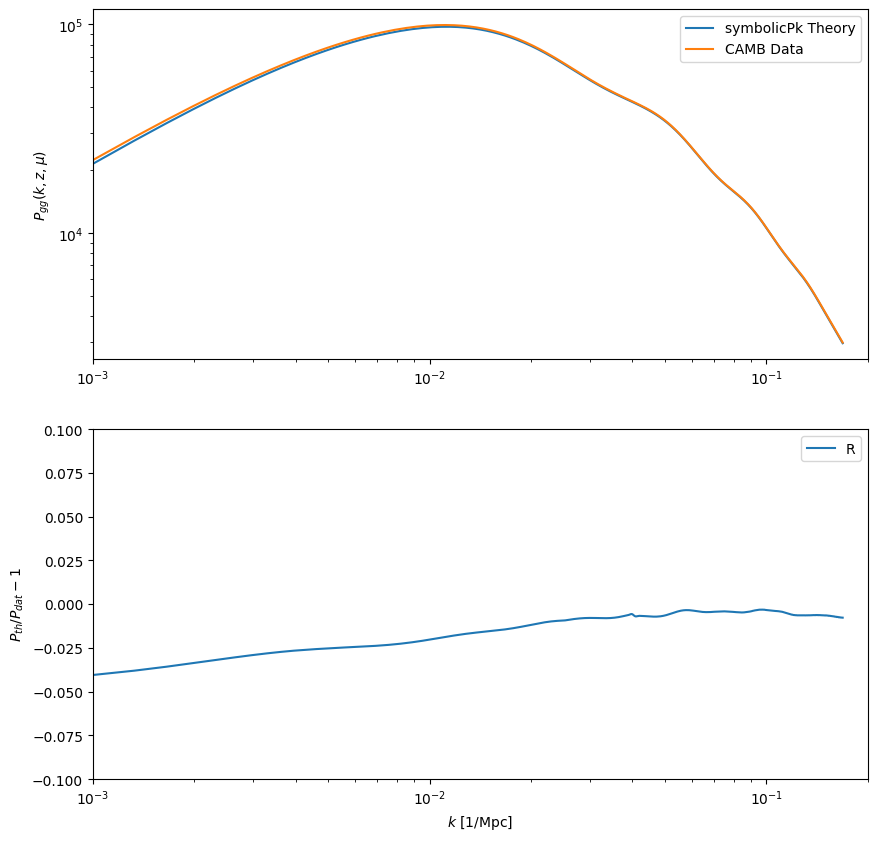

In [12]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
pktheo = cosmoFM_theory.pk_obs_fid.observed_Pgg(1.0, cosmoFM_theory.Pk_kgrid, 0.66)
pkdata = cosmoFM_data.pk_obs_fid.observed_Pgg(1.0, cosmoFM_data.Pk_kgrid, 0.66)
axs[0].loglog(cosmoFM_theory.Pk_kgrid, pktheo)
axs[0].loglog(cosmoFM_data.Pk_kgrid, pkdata)
axs[0].legend(['symbolicPk Theory', 'CAMB Data'])
axs[1].semilogx(cosmoFM_theory.Pk_kgrid, (pktheo/pkdata - 1))
axs[0].set_xlim(1e-3, 0.2)
axs[1].set_xlim(1e-3, 0.2)
axs[1].set_ylim(-0.1, 0.1)
axs[0].set_ylabel(r'$P_{gg}(k,z, \mu)$')
axs[1].set_ylabel(r'$P_{th}/P_{dat} - 1$')
axs[1].set_xlabel(r'$k$ [1/Mpc]')
axs[1].legend('Ratio Theory to Data')


## Choose data vector

In [12]:
obsPgg_data = observable_Pgg(spectro_cov_data, cosmoFM_data)
obsPgg_data.shape

(4, 9, 513)

In [13]:
P_ell_data = legendre_Pgg(obsPgg_data, cosmoFM_data)
P_ell_data.shape

(513, 4, 3)

In [14]:
fid_truth = {par : cosmoFM_data.allparams[par] for par in cosmoFM_data.freeparams.keys()}
fid_truth

{'Omegam': 0.3145714273,
 'Omegab': 0.0491989,
 'h': 0.6737,
 'ns': 0.96605,
 'sigma8': 0.81,
 'Ps_1': 0.0,
 'Ps_2': 0.0,
 'Ps_3': 0.0,
 'Ps_4': 0.0,
 'lnbg_1': 0.37944989,
 'lnbg_2': 0.4738057,
 'lnbg_3': 0.55760176,
 'lnbg_4': 0.64125687}

## Compute example loglike

In [15]:
samp1dic = {'Omegam': 0.31,
            'Omegab': 0.05,
            'h': 0.68,
            'ns': 0.96,
            'sigma8': 0.82,
            'w0': -1.01,
            'wa': 0.2,
            'Ps_0': 0.0,
            'Ps_1': 0.0,
            'Ps_2': 0.0,
            'Ps_3': 10.0,
            'lnbg_1': 0.37944989,
            'lnbg_2': 0.4738057,
            'lnbg_3': 0.55760176,
            'lnbg_4': 0.6,
            'sigmap_1': 1.0,
            'sigmap_2': 0.,
            'sigmap_3': 1.0,
            'sigmap_4': 1.0,
            'sigmav_1': 1.0,
            'sigmav_2': 1.0,
            'sigmav_3': 0.,
            'sigmav_4': 10,
            'bI_c1': -0.3,
            'bI_c2': +0.6,
            }
print("Wedges loglike: ", loglike(samp1dic, leg_flag='wedges', cosmoFM_theory=cosmoFM_theory, cosmoFM_data=cosmoFM_data, data_obsPgg=obsPgg_data))
print("Multipoles loglike: ", loglike(samp1dic, leg_flag='legendre', cosmoFM_theory=cosmoFM_theory, cosmoFM_data=cosmoFM_data, data_obsPgg=obsPgg_data))

Wedges loglike:  -590.2634422857816
Multipoles loglike:  -590.8641353388894


In [16]:
%%timeit
loglike(samp1dic, leg_flag='wedges', cosmoFM_theory=cosmoFM_theory, cosmoFM_data=cosmoFM_data, data_obsPgg=obsPgg_data)

226 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
loglike(samp1dic, leg_flag='legendre', cosmoFM_theory=cosmoFM_theory, cosmoFM_data=cosmoFM_data, data_obsPgg=obsPgg_data)

333 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Initialize Nautilus sampler

In [18]:
prior = Prior()
prior_noshot = Prior()
prior_noshot_no_bi = Prior()
prior_nosigma = Prior()

In [19]:
prior_dict ={
 'Omegam': [0.24, 0.4],
 'Omegab': [0.04, 0.06],
 'h': [0.61, 0.73],
 'ns': [0.92, 1.00],
 'sigma8': [0.79, 0.83],
 'Ps_0': [-10, 10],
 'Ps_1': [-10, 10],
 'Ps_2': [-10, 10],
 'Ps_3': [-10, 10],
 'lnbg_1': [0, 1],
 'lnbg_2': [0, 1],
 'lnbg_3': [0, 1],
 'lnbg_4': [0, 1],
 'sigmap_1': [0, 10],
 'sigmap_2': [0, 10],
 'sigmap_3': [0, 10],
 'sigmap_4': [0, 10],
 'sigmav_1': [0, 10],
 'sigmav_2': [0, 10],
 'sigmav_3': [0, 10],
 'sigmav_4': [0, 10],
 'bI_c1': [-5, 5],
 'bI_c2': [-5, 5],
 }


In [20]:
cosmoFM_theory.freeparams

{'Omegam': 0.01,
 'Omegab': 0.01,
 'h': 0.01,
 'ns': 0.01,
 'sigma8': 0.01,
 'Ps_1': 0.0001,
 'Ps_2': 0.0001,
 'Ps_3': 0.0001,
 'Ps_4': 0.0001,
 'lnbg_1': 0.0001,
 'lnbg_2': 0.0001,
 'lnbg_3': 0.0001,
 'lnbg_4': 0.0001}

In [21]:
for par in prior_dict.keys():
    if par in cosmoFM_theory.freeparams.keys():
        dist_prior = (prior_dict[par][0], prior_dict[par][1])
        prior.add_parameter(par, dist_prior)
        if 'sigmap' not in par and 'sigmav' not in par:
            prior_nosigma.add_parameter(par, dist_prior)
        if 'Ps' not in par and ('sigmap' not in par and 'sigmav' not in par):
            prior_noshot.add_parameter(par, dist_prior)
        if 'Ps' not in par and 'lnbg' not in par and ('sigmap' not in par and 'sigmav' not in par):
            prior_noshot_no_bi.add_parameter(par, dist_prior)

In [22]:
print('Loaded prior into Nautilus with dimension',prior.dimensionality())
print('Loaded prior into Nautilus with dimension',prior_noshot.dimensionality())
print('Loaded prior into Nautilus with dimension',prior_noshot_no_bi.dimensionality())
print('Loaded prior into Nautilus with dimension',prior_nosigma.dimensionality())
print('Prior keys: ',prior.keys)
print('Prior keys noshot: ',prior_noshot.keys)
print('Prior keys noshot no bi: ',prior_noshot_no_bi.keys)
print('Prior keys nosigma: ',prior_nosigma.keys)

Loaded prior into Nautilus with dimension 12
Loaded prior into Nautilus with dimension 9
Loaded prior into Nautilus with dimension 5
Loaded prior into Nautilus with dimension 12
Prior keys:  ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'Ps_1', 'Ps_2', 'Ps_3', 'lnbg_1', 'lnbg_2', 'lnbg_3', 'lnbg_4']
Prior keys noshot:  ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'lnbg_1', 'lnbg_2', 'lnbg_3', 'lnbg_4']
Prior keys noshot no bi:  ['Omegam', 'Omegab', 'h', 'ns', 'sigma8']
Prior keys nosigma:  ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'Ps_1', 'Ps_2', 'Ps_3', 'lnbg_1', 'lnbg_2', 'lnbg_3', 'lnbg_4']


In [23]:
outfile_chain_path = 'cosmicjellyfish_eucid_spectro_legendre_nonuis'
prior_to_use = prior_noshot_no_bi
print("Loading prior with keys: ", prior_to_use.keys)

Loading prior with keys:  ['Omegam', 'Omegab', 'h', 'ns', 'sigma8']


In [24]:
print("Loading prior with keys: ", prior_to_use.keys)
sampler = Sampler(prior_to_use, 
                          loglike, 
                          n_live=1000, 
                          n_networks=4, 
                          n_batch=256, pool=8, 
                          pass_dict=False,
                          filepath=outfile_chain_path+'.hdf5', 
                          resume=True,
                          likelihood_kwargs={'leg_flag': 'legendre', 
                                             'prior': prior_to_use,
                                             'cosmoFM_theory': cosmoFM_theory,
                                             'cosmoFM_data': cosmoFM_data,
                                             'data_obsPgg': obsPgg_data}
                          )
sampler.run(verbose=True, discard_exploration=True)
log_z_all = sampler.evidence()
print('Evidence:', log_z_all)
print("Sampling posterior")
points_all, log_w_all, log_l_all = sampler.posterior()

Loading prior with keys:  ['Omegam', 'Omegab', 'h', 'ns', 'sigma8']
Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Finished  | 26     | 1        | 4        | 41728    | N/A    | 10140 | -15.49   
Evidence: -15.492472294484205
Sampling posterior


/tmp/ipykernel_175917/2438946709.py:17: DeprecationWarning: The function 'evidence' is deprecated. Please use the property 'log_z', instead.
  log_z_all = sampler.evidence()


In [25]:
sample_wghlkl = (np.vstack((points_all.T, np.exp(log_w_all), log_l_all)).T)

In [26]:
outfile_new = outfile_chain_path
print(f"Saving chain to text file {outfile_new}.txt")

Saving chain to text file cosmicjellyfish_eucid_spectro_legendre_nonuis.txt


In [27]:
np.savetxt(outfile_new + '.txt', sample_wghlkl)
